# Sect 25-Pt 1: Intro to Logistic Regression 

- online-ds-pt-041320
- 08/28/20

## Questions?

[Gdoc](https://docs.google.com/document/d/196yIMNSRSRspBdBmjHq7vMhFF-YdpvkyYEHYV5nm8xg/edit#)

## Announcements

- **Sect 25 will be split into 2 study groups.**
- Sect 26 doesn't introduce much/anything new
    - It revisits gradient descent and applies it to Logistic Regression.
    - **We will discuss** some of the concepts re-introduced next study group.
    - **We will NOT have an entire study group** dedicated to section 26


- **You will want/need to update matplotlib and scikit-learn** ( See IMPORTANT NOTE ABOUT PACKAGE VERSIONS)
   

## Topics in Sect 25

- For Today:
    - Supervised vs Unsupervised Learning
    - Logistic Regression - Theory
    - Applying Logistic Regression with `statsmodels`
    - Evaluating Classifiers
        - Accuracy, Precision, Recall, F1-Score
        - Confusion Matrices


- For Next Class:
    - Evaluating Classifiers:
        - ROC-AUC curve
    - Class Imbalance Problems

## IMPORTANT NOTE ABOUT PACKAGE VERSIONS

### scikit-learn

In [1]:
## Run COnda List to Verify what versions are installed and how
%conda list scikit-learn

# packages in environment at /opt/anaconda3/envs/learn-env:
#
# Name                    Version                   Build  Channel
scikit-learn              0.23.2           py36h637a150_0    conda-forge

Note: you may need to restart the kernel to use updated packages.


- You will need sklearn to be version 0.23 + to have all of the tools covered in lessons.
    > Note: sklearn is listed as `scikit-learn`<br>to update: 
    `conda update scikit-learn`
 

In [2]:
# %conda update scikit-learn

### Matplotlib

In [3]:
%conda list matplotlib

# packages in environment at /opt/anaconda3/envs/learn-env:
#
# Name                    Version                   Build  Channel
matplotlib                3.3.1                    pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


- You will want to update matplotlib to fix errors with your confusion matrix plots
    > `pip install -U matplotlib`

In [4]:
# !pip install -U matplotlib

# Types of Machine Learning Models

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/ai_machine_learning_deep_learning.png">

## Intro to Supervised Learning

> "The term **_Supervised Learning_** refers to a class of machine learning algorithms that can "learn" a task through **_labeled training data_**."

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-intro-to-supervised-learning-v2-1-online-ds-pt-100719/master/images/new_ml-hierarchy.png" width=60%>

# From Linear Regression to Logistic Regression


<img src="https://raw.githubusercontent.com/jirvingphd/online-dtsc-pt-041320-cohort-notes/master/assets/images/logistic_vs_linear.jpg">

## How is it used?

### Linear Regression

Trying to find the **relationship** and predict a specific value.

- Examples of regressions:
    - House prices
    - Salary
    - Reviews/Ratings

### Classification

Trying to identify what features can predict which class a particular observation/row belongs to.
- Can be a "binary classification" 
    - "yes" or "no"
    - Survived or died.
    - Diabetic or not-diabetic
- Can also be a "multiclass classification"
    - Which type of flower?
    - Will a football game end one team winning, or the other team, or a tie?


## Recall Linear Regression

### Formula

$$ \large \hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n = \sum_{i=0}^{N} \beta_i x_i $$

- Output is specifying the **predicted value** for the target

## Classification: Use Logistic Regression

- Output is specifying the **probability** of belonging to a particular group

- Visual Example:
    - https://www.desmos.com/calculator/y2ilpxiqys

Transform from linear regression!

$$ \large \hat y = \sum_{i=0}^{N} \beta_i x_i $$

$$\large P = \displaystyle \frac{1}{1+e^{-\hat y}} = \frac{1}{1+e^{-\sum_{i=0}^{N} \beta_i x_i}} $$

$$ \large = \frac{1}{1+e^{-\beta_0}e^{-\beta_1 x_1}\ldots e^{-\beta_N x_N}} $$

# Implementing Logistic Regression

## Functions from Last Class

In [5]:
# !pip install -U fsds
from fsds.imports import *
import statsmodels.api as sm

fsds v0.2.23 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


## Predict Passenger Survival on Titanic

In [6]:
df = fs.datasets.load_titanic(read_csv_kwds={'index_col':0})
relevant_columns = ['Pclass', 'Age', 'SibSp', 'Fare', 'Sex', 'Embarked', 'Survived']
df = df[relevant_columns]
df.head()

,Pclass,Age,SibSp,Fare,Sex,Embarked,Survived
0,3,22.0,1,7.2500,male,S,0
1,1,38.0,1,71.2833,female,C,1
2,3,26.0,0,7.9250,female,S,1
3,1,35.0,1,53.1000,female,S,1
4,3,35.0,0,8.0500,male,S,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    object 
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Sex       891 non-null    object 
 5   Embarked  889 non-null    object 
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 55.7+ KB


In [8]:
# Recast Number Cols
df['Pclass'] = pd.to_numeric(df['Pclass'],errors='coerce')

In [9]:

df['Survived'].value_counts(normalize=True,dropna=False)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

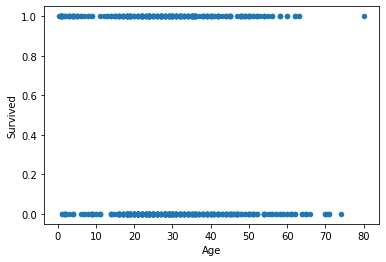

In [10]:
df.plot('Age','Survived',kind='scatter');

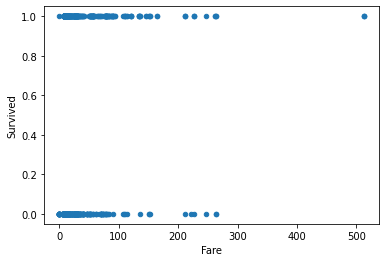

In [11]:
df.plot('Fare','Survived',kind='scatter');

### Q: What are the preprocessing steps I need to perform before I create the model?

- Fill/drop in missing/null values
- Feature Selection / Feature Engineering (interaction terms)
- Handling categorial variables
    - One Hot Encoding 
    - Label Encoding
- Handling Outliers (maybe apply today)
- Normalizing/Standardizing our data

- **Multicollinearity (does it still matter as much for Logistic?)**

- Train-test-split


### A: 

- Address null values
- Encode categorical data
- Train-test-split
- Train Model with train data
- Evaluate Model with test data

### Preprocessing

In [12]:
## Null Values
df.isna().sum() / len(df)

Pclass      0.054994
Age         0.198653
SibSp       0.000000
Fare        0.000000
Sex         0.000000
Embarked    0.002245
Survived    0.000000
dtype: float64

In [13]:
# df_ohe = pd.get_dummies(df,drop_first=True,dtype=float)
# df_ohe.isna().sum() / len(df_ohe)

In [14]:
# df_ohe.dropna(inplace=True)
# df_ohe.info()

In [15]:
target = 'Survived'
X = df.drop(columns=target)
y = df[target]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_test.shape

((668, 6), (223,))

In [17]:
cat_cols = X_train.select_dtypes('O').columns
cat_cols

Index(['Sex', 'Embarked'], dtype='object')

In [18]:
num_cols = X_train.select_dtypes('number').columns
num_cols

Index(['Pclass', 'Age', 'SibSp', 'Fare'], dtype='object')

In [19]:
X_train.isna().sum()

Pclass       37
Age         136
SibSp         0
Fare          0
Sex           0
Embarked      1
dtype: int64

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
train_nulls = X_train.isna().any(axis=1)
test_nulls = X_test.isna().any(axis=1)


In [22]:
imputer_num = SimpleImputer(strategy='median')

# dropna_cols = [*cat_cols,'Age']
X_train = X_train.loc[~train_nulls]
y_train = y_train.loc[~train_nulls]

X_test = X_test.loc[~test_nulls]
y_test = y_test.loc[~test_nulls]
# X_train.isna().sum()

In [23]:
y_test.isna().sum()

0

In [24]:
# # imputer_cat = SimpleImputer(strategy='most_frequent')#,fill_value='missing')

# X_train[num_cols] = imputer_num.fit_transform(X_train[num_cols])
# X_test[num_cols] = imputer_num.transform(X_test[num_cols])

# X_train[cat_cols] = imputer_cat.fit_transform(X_train[cat_cols])
# X_test[cat_cols] = imputer_cat.transform(X_test[cat_cols])

# # df['Age'] = imputer.fit_transform(df[['Age']])

In [25]:
X_train.isna().sum(), X_test.isna().sum()

(Pclass      0
 Age         0
 SibSp       0
 Fare        0
 Sex         0
 Embarked    0
 dtype: int64,
 Pclass      0
 Age         0
 SibSp       0
 Fare        0
 Sex         0
 Embarked    0
 dtype: int64)

In [26]:
X_train

,Pclass,Age,SibSp,Fare,Sex,Embarked
715,3.0,19.0,0,7.6500,male,S
809,1.0,33.0,1,53.1000,female,S
316,2.0,24.0,1,26.0000,female,S
88,1.0,23.0,3,263.0000,female,S
519,3.0,32.0,0,7.8958,male,S
...,...,...,...,...,...,...
605,3.0,36.0,1,15.5500,male,S
640,3.0,20.0,0,7.8542,male,S
378,3.0,20.0,0,4.0125,male,C
43,2.0,3.0,1,41.5792,female,C


In [27]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False,drop='first')#,handle_unknown='ignore')

X_train_ohe = X_train.drop(columns=cat_cols).copy()
X_test_ohe = X_test.drop(columns=cat_cols).copy()


encoder.fit(X_train[cat_cols])

X_train_ohe[encoder.get_feature_names(cat_cols)] = encoder.transform(X_train[cat_cols])
X_test_ohe[encoder.get_feature_names(cat_cols)] = encoder.transform(X_test[cat_cols])

X_train_ohe

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
715,3.0,19.0,0,7.6500,1.0,0.0,1.0
809,1.0,33.0,1,53.1000,0.0,0.0,1.0
316,2.0,24.0,1,26.0000,0.0,0.0,1.0
88,1.0,23.0,3,263.0000,0.0,0.0,1.0
519,3.0,32.0,0,7.8958,1.0,0.0,1.0
...,...,...,...,...,...,...,...
605,3.0,36.0,1,15.5500,1.0,0.0,1.0
640,3.0,20.0,0,7.8542,1.0,0.0,1.0
378,3.0,20.0,0,4.0125,1.0,0.0,0.0
43,2.0,3.0,1,41.5792,0.0,0.0,0.0


In [28]:
## Scale data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler= StandardScaler()

X_train_sca = X_train_ohe.copy()
X_test_sca = X_test_ohe.copy()


X_train_sca[num_cols] = scaler.fit_transform(X_train_sca[num_cols])
X_test_sca[num_cols] = scaler.transform(X_test_sca[num_cols])

In [29]:
X_train_sca#.describe().round(2)

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
715,0.868497,-0.716177,-0.545820,-0.507944,1.0,0.0,1.0
809,-1.511654,0.254899,0.494522,0.377863,0.0,0.0,1.0
316,-0.321579,-0.369365,0.494522,-0.150308,0.0,0.0,1.0
88,-1.511654,-0.438727,2.575206,4.468750,0.0,0.0,1.0
519,0.868497,0.185536,-0.545820,-0.503154,1.0,0.0,1.0
...,...,...,...,...,...,...,...
605,0.868497,0.462986,0.494522,-0.353976,1.0,0.0,1.0
640,0.868497,-0.646815,-0.545820,-0.503964,1.0,0.0,1.0
378,0.868497,-0.646815,-0.545820,-0.578838,1.0,0.0,0.0
43,-0.321579,-1.825979,0.494522,0.153326,0.0,0.0,0.0


## Fitting a Logistic Regression with `statsmodels`

In [30]:
import statsmodels.api as sm

In [31]:
y_train.value_counts()

0    312
1    195
Name: Survived, dtype: int64

In [32]:
X_train_sms = sm.add_constant(X_train_sca)
X_test_sms = sm.add_constant(X_test_sca)
X_train_sms

,const,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
715,1.0,0.868497,-0.716177,-0.545820,-0.507944,1.0,0.0,1.0
809,1.0,-1.511654,0.254899,0.494522,0.377863,0.0,0.0,1.0
316,1.0,-0.321579,-0.369365,0.494522,-0.150308,0.0,0.0,1.0
88,1.0,-1.511654,-0.438727,2.575206,4.468750,0.0,0.0,1.0
519,1.0,0.868497,0.185536,-0.545820,-0.503154,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
605,1.0,0.868497,0.462986,0.494522,-0.353976,1.0,0.0,1.0
640,1.0,0.868497,-0.646815,-0.545820,-0.503964,1.0,0.0,1.0
378,1.0,0.868497,-0.646815,-0.545820,-0.578838,1.0,0.0,0.0
43,1.0,-0.321579,-1.825979,0.494522,0.153326,0.0,0.0,0.0


In [33]:
logit = sm.Logit(y_train,X_train_sms).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.454896
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  507
Model:                          Logit   Df Residuals:                      499
Method:                           MLE   Df Model:                            7
Date:                Fri, 28 Aug 2020   Pseudo R-squ.:                  0.3173
Time:                        18:51:06   Log-Likelihood:                -230.63
converged:                       True   LL-Null:                       -337.80
Covariance Type:            nonrobust   LLR p-value:                 1.047e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1807      0.323      3.657      0.000       0.548       1.813
Pclass        -1.0063      0.153     -6.558      0.000      -1.307      -0.706
Age           -0.6170      0.139     -4.444      0.000      -0.889      -0.345
SibSp         -0.4366      0.145     -3.018      0.003      -0.720      -0.153
Fare          -0.0008      0.130     -0.006      0.995      -0.255       0.253
Sex_male      -2.3508      0.249     -9.449      0.000      -2.838      -1.863
Embarked_Q    -1.1480      0.786     -1.461      0.144      -2.688       0.392
Embarked_S    -0.3700      0.316     -1.171      0.242      -0.989       0.250
==============================================================================
"""

> ### But how do we know how GOOD it is?

# Evaluating Classifications 

> [The 5 Classification Evaluation metrics every Data Scientist must know](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226)

## Evaluation Metrics

### Accuracy

$$ \large \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

> "Out of all the predictions our model made, what percentage were correct?"
- "Accuracy is the most common metric for classification. It provides a solid holistic view of the overall performance of our 
model."

#### When to use?
- **Accuracy** is good for non-technical audiences (but can be misleading with imbalanced classes)


In [34]:
from sklearn import metrics

In [35]:
y_hat_train = logit.predict(X_train_sms)
y_hat_test = logit.predict(X_test_sms)

In [36]:
metrics.accuracy_score(y_test,y_hat_test).round(2)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

> #### Huh?! ... Compare Predictions vs Original Data

In [38]:
display(y_hat_train.head(),y_train.head())

715    0.150138
809    0.876363
316    0.758858
88     0.813785
519    0.091964
dtype: float64

715    0
809    1
316    1
88     1
519    0
Name: Survived, dtype: int64

In [39]:
## Round predictions
y_hat_train = y_hat_train.round()
y_hat_test = y_hat_test.round()
display(y_hat_train.head(),y_train.head())

715    0.0
809    1.0
316    1.0
88     1.0
519    0.0
dtype: float64

715    0
809    1
316    1
88     1
519    0
Name: Survived, dtype: int64

In [40]:
metrics.accuracy_score(y_test,y_hat_test).round(2)

0.83

### Precision

> "**_Precision_** measures what proportion of predicted Positives is truly Positive?


$$ \large \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$


#### When to use?
- **Use precision** when the cost of acting is high and acting on a positive is costly.
   - e.g. Allocating resources/interventions for prisoners who are at-risk for recidivism. 

In [41]:
metrics.precision_score(y_test,y_hat_test).round(2)

0.85

### Recall

> **_Recall_** indicates what percentage of the classes we're interested in were actually captured by the model."
$$ \large \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$ 


#### When to use?
- **Use recall** when the number of true positives/opportunities is small and you don’t want to miss one.
    - e.g. cancer diagnosis. (telling someone they do not have cancer when they actually do is fatal)

In [42]:
metrics.recall_score(y_test,y_hat_test)

0.7222222222222222

<img src='https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/precisionrecall.png' width=10%>

### $F_1$ Score

F1 score represents the **_Harmonic Mean of Precision and Recall_**.  In short, this means that the F1 score cannot be high without both precision and recall also being high. When a model's F1 score is high, you know that your model is doing well all around. 

> Harmonic Mean: "the reciprocal of the arithmetic mean of the reciprocals of a given set of observatins." - *[Wikipedia](https://en.wikipedia.org/wiki/Harmonic_mean)*

#### Arithmetic Mean:

$$\large \bar{X} = \frac{a+b+c}{n} $$

#### Harmonic Mean:

$$ \large \bar{X} = \frac{n}{\frac{1}{a}+ \frac{1}{b}+ \frac{1}{c}}$$


**The formula for F1 score is:**

> $$ \text{F1 score} =  \frac{2}{\text{Precision}^{-1}\ x\ \text{Recall}^{-1}}= 2\ \frac{\text{Precision}\ x\ \text{Recall}}{\text{Precision} + \text{Recall}} $$

#### When to use?
- **F1 score** is really the most informative about overall model quality.
- BUT is the most difficult to express to a non-tech audience

In [43]:
metrics.f1_score(y_test,y_hat_test)

0.7819548872180451

## Which metric to use?

- **When in doubt, use them all!** 
 -`metrics.classification_report`
 

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        97
           1       0.85      0.72      0.78        72

    accuracy                           0.83       169
   macro avg       0.83      0.81      0.82       169
weighted avg       0.83      0.83      0.83       169



- **But some good rules of thumb:**
    - **Accuracy** is good for non-technical audiences (but can be misleading with imbalanced classes)
    
    - **Use recall** when the number of true positives/opportunities is small and you don’t want to miss one.
        - e.g. cancer diagnosis. (telling someone they do not have cancer when they actually do is fatal)
    - **Use precision** when the cost of acting is high and acting on a positive is costly.
       - e.g. Allocating resources/interventions for prisoners who are at-risk for recidivism. 

- **F1 score** is really the most informative about overall model quality, but is the most difficult to express to a non-tech audience

## Confusion Matrices

- A **confusion matrix** separates our predictions into 4 types of outcomes (for a binary classification):
    - **_True Positives (TP)_**: The number of observations where the model predicted the person has the disease (1), and they actually do have the disease (1).

    - **_True Negatives (TN)_**: The number of observations where the model predicted the person is healthy (0), and they are actually healthy (0).

    - **_False Positives (FP)_**: The number of observations where the model predicted the person has the disease (1), but they are actually healthy (0). 

    - **_False Negatives (FN)_**: The number of observations where the model predicted the person is healthy (0), but they actually have the disease (1).

    <img src="https://raw.githubusercontent.com/learn-co-students/dsc-visualizing-confusion-matrices-lab-online-ds-ft-100719/master/images/new_confusion_matrix_2.png" width=50%>

In [45]:
cm = metrics.confusion_matrix(y_test,y_hat_test.round())
cm

array([[88,  9],
       [20, 52]])

In [46]:
cm_norm = metrics.confusion_matrix(y_test,y_hat_test.round(),normalize='true')
cm_norm

array([[0.90721649, 0.09278351],
       [0.27777778, 0.72222222]])

In [47]:
 classes=['Died','Survived']

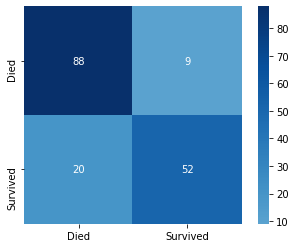

In [48]:
ax = sns.heatmap(cm,annot=True,square=True, center=0,cmap='Blues',
           xticklabels=classes,yticklabels=classes)

In [49]:
def plot_confusion_matrix(y_test,y_hat_test, normalize='true',
                          classes=['Died','Survived'],cmap='Blues',
                         style='seaborn-notebook'):
    
    cm = metrics.confusion_matrix(y_test,y_hat_test.round(),
                                  normalize=normalize)
    
    with plt.style.context(style):
        ax = sns.heatmap(cm,annot=True,square=True, center=0,cmap=cmap,
                   xticklabels=classes,yticklabels=classes)
        
    if normalize==False:
        title = "Raw Confusion Matrix"
    else:
        title = f"Normalized Confusion Matrix\n(by {normalize} classes)"
        
    ax.set(ylabel='True Classes',xlabel='Predicted Classes',title=title)
    fig = ax.get_figure()
    
    return fig,ax


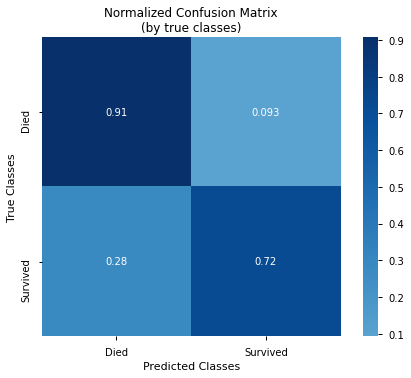

In [50]:
fig,ax = plot_confusion_matrix(y_test,y_hat_test)

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.81      0.91      0.86        97
    Survived       0.85      0.72      0.78        72

    accuracy                           0.83       169
   macro avg       0.83      0.81      0.82       169
weighted avg       0.83      0.83      0.83       169

------------------------------------------------------------


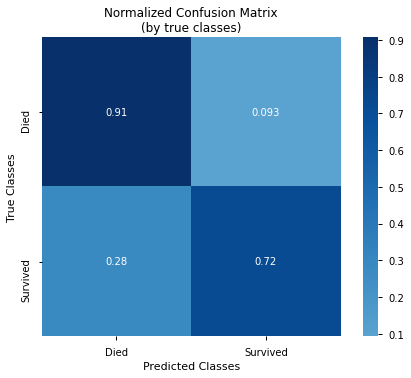

In [51]:
def evaluate_model(y_test,y_hat_test,classes=['Died','Survived'],
                   normalize='true',cmap='Blues'):
    dashes = '---'*20
    print(dashes)
    print("[i] CLASSIFICATION REPORT")
    print(dashes)
    
    print(metrics.classification_report(y_test,y_hat_test.round(),
                                        target_names=classes))
    print(dashes)
    fig,ax = plot_confusion_matrix(y_test,y_hat_test)

    
evaluate_model(y_test,y_hat_test)

# APPENDIX 

In [52]:
def remake_df(array,df):
    return pd.DataFrame(array, columns=df.columns, index=df.index)

def fit_evaluate_model(linreg,X_train_sca, X_test_sca, y_train, y_test):
    linreg.fit(X_train_sca, y_train)

    y_hat_train = linreg.predict(X_train_sca)
    y_hat_test = linreg.predict(X_test_sca)

    return linreg

def get_model_coeffs(X_df, sklearn_model=None, ols_model = None):
    
    coeffs_df = pd.DataFrame()
    
    if sklearn_model is not None:

        coeffs = dict(zip(X_df.columns,sklearn_model.coef_))
        coeffs['const'] = sklearn_model.intercept_

        coeffs_df = pd.DataFrame(coeffs,index=['sklearn']).T

    if ols_model is not None:
        coeffs_df = coeffs_df.join(ols_model.params.rename('statsmodels'))
        coeffs_df = coeffs_df.join(ols_model.pvalues.rename('p-values').round(4))
        
    return coeffs_df